### Problem Set 3

who is the central player in this
technology area ? Who is the leader ? Who is an irrelevant actor ?

In [93]:
import networkx as nx
import operator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import community
from networkx.algorithms.community import k_clique_communities
from operator import itemgetter

In [ ]:
G = nx.read_edgelist('network_prof.txt')
       
# function that generate connected components as subgraphs:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

# check number of components of the network:

graph_max = max(connected_component_subgraphs(G))
graph_min = min(connected_component_subgraphs(G))

print("Information about the network: \n" + nx.info(G))
print("\nInformation about the max subgraph: \n" + nx.info(graph_max))
print("\nInformation about the min subgraph: \n" + nx.info(graph_min))

if G.number_of_nodes() == graph_max.number_of_nodes():
    # the number of nodes of the network is equal to the max subgraph. so there is only one subgraph.
    # we could have done the same with the min
    print("We only have one directed component")

In [3]:
nodes = list(G.nodes)
num_nodes = G.number_of_nodes()
position = nx.spring_layout(G) # position nodes using Fruchterman-Reingold force-directed algorithm.

In [116]:
# plot function
def plot_network(G, position, nodes, Z, color_special, first_figure, last_figure):
    # G is the graph
    # position is calculated using Fruchterman-Reingold force-directed algorithm.
    # nodes: all nodes
    # Z: subset of nodes to highlight
    # color_special = color of these highlighted nodes
    # first_figure: start a new figure?
    # last_figure: now a new one to put togheter
    
    if first_figure==True: plt.figure(figsize=(10,10)) #create a new figure
        
    if first_figure == True: # not re-draw nodes/edges if it is not the new figure
        nx.draw_networkx_nodes(G, position, nodes, node_size = 7, node_color = "#fffd37" , alpha = 0.7)
        nx.draw_networkx_edges(G, position, alpha = 0.5)
        
    # special nodes
    nx.draw_networkx_nodes(G, position, Z, node_size = 17, node_color = color_special)

    
    plt.axis('off')
    
    if last_figure==True: plt.show()
    

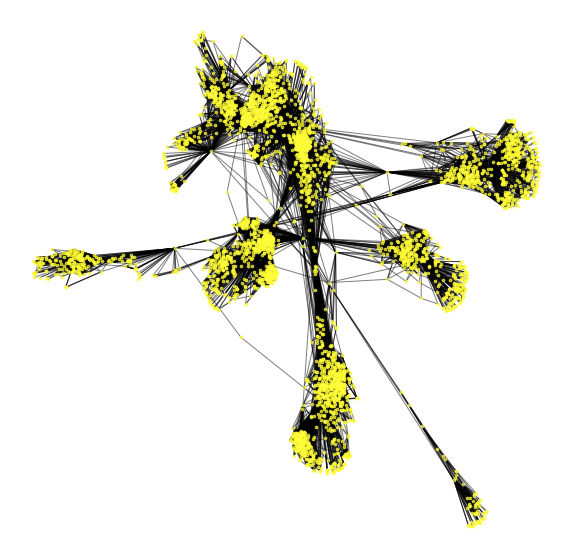

In [117]:
# picture of the network:
plot_network(G, position, nodes, [], 'r', True, True)

## Significant Nodes
At this point we have to analyise our network. To understand the leader and irrelevant actors, we measure the vertex importance. We will analize

- Node degree
- Betweenness
- Eigenvector centrality

**Node Degree**: The node degree is the number of edges adjacent to the node

In [100]:
nodes_degree = G.degree
print(f" For example, node number '{list(nodes_degree)[0][0]}' degree is equal to {list(nodes_degree)[0][1]}.")

 For example, node number '0' degree is equal to 347.


In our dataset, each node is a person. Then the degree of that person is the number of people he/she is talking to. Let us see who are the people with more contacts:

In [101]:
degrees = [val for (node, val) in G.degree()] #only the values
nodes = [node for (node, val) in G.degree()] #only the node

centrality = [x for _,x in sorted(zip(degrees,nodes), reverse=True)][0:10] # first ten nodes
degree_most_connected = G.degree(Z)
list(degree_most_connected)[:][1]

print("Nodes with highest DEGREE:")
for i in range(10):
    print(f"Position #{i+1}: node {list(degree_most_connected)[i][0]} with degree {list(degree_most_connected)[i][1]}")

Nodes with highest DEGREE:
Position #1: node 107 with degree 1045
Position #2: node 1684 with degree 792
Position #3: node 1912 with degree 755
Position #4: node 3437 with degree 547
Position #5: node 0 with degree 347
Position #6: node 2543 with degree 294
Position #7: node 2347 with degree 291
Position #8: node 1888 with degree 254
Position #9: node 1800 with degree 245
Position #10: node 1663 with degree 235


Highlight these nodes in the network:

Highlight nodes with the highest centrality


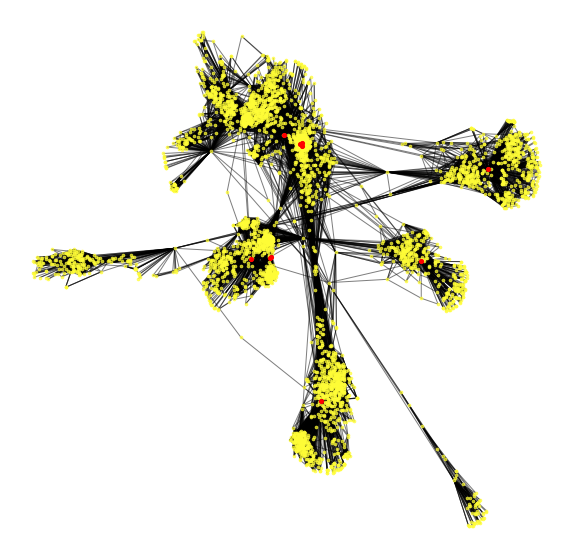

In [112]:
#PRINT

print("Highlight nodes with the highest centrality")
plot_network( G, position, nodes, centrality, 'r', True, True)

**Betweenness**: measures how frequently a mode is in the shortest path between any two nodes

In [19]:
# warning!! the next command is realy slow

betweenness = nx.betweenness_centrality(G) # compute the shortest-path betweenness centrality for nodes. return a dictionary

{'0': 0.14630592147442917,
 '1': 2.7832744209034606e-06,
 '2': 7.595021178512074e-08,
 '3': 1.6850656559280464e-06,
 '4': 1.8403320547933104e-07,
 '5': 2.205964164092193e-06,
 '6': 2.4537760730577472e-08,
 '7': 0.0001702984836730339,
 '8': 2.7604980821899654e-07,
 '9': 1.6454236303026905e-05,
 '10': 4.986739552037655e-08,
 '11': 0.0,
 '12': 0.0,
 '13': 1.7622717578436846e-06,
 '14': 5.582871686568508e-07,
 '15': 0.0,
 '16': 1.9979459275532697e-07,
 '17': 4.1066669000480344e-07,
 '18': 0.0,
 '19': 5.062957964075819e-06,
 '20': 6.793693332142838e-07,
 '21': 0.0009380243844653233,
 '22': 6.703002200833232e-07,
 '23': 6.860348937590618e-06,
 '24': 1.3673472422981514e-07,
 '25': 5.38808313945586e-05,
 '26': 1.935436798204632e-05,
 '27': 3.067220091322184e-08,
 '28': 3.812160659244892e-07,
 '29': 1.3954817951917517e-06,
 '30': 1.3694627409316544e-06,
 '31': 4.932641252790837e-06,
 '32': 0.0,
 '33': 0.0,
 '34': 0.0036020881281963652,
 '35': 0.0,
 '36': 2.726417858953052e-08,
 '37': 0.0,
 '38'

We find the 10 people with highest betweenness. Betweenness centrality measures how important a node is to the shortest paths through the network. Hence, when we talk about links, it is important to find nodes which apprears more often.

In [52]:
high_btw = sorted(betweenness.items(), key=itemgetter(1), reverse=True)[:10]

print("Nodes with highest BETWEENNESS CENTRALITY:")
for i in range(10):
    print(f"Position #{i+1}: node {high_btw[i][0]} with betw_cen {high_btw[i][1]}")

Nodes with highest BETWEENNESS CENTRALITY:
Position #1: node 107 with betw_cen 0.4805180785560152
Position #2: node 1684 with betw_cen 0.3377974497301992
Position #3: node 3437 with betw_cen 0.23611535735892905
Position #4: node 1912 with betw_cen 0.2292953395868782
Position #5: node 1085 with betw_cen 0.14901509211665306
Position #6: node 0 with betw_cen 0.14630592147442917
Position #7: node 698 with betw_cen 0.11533045020560802
Position #8: node 567 with betw_cen 0.09631033121856215
Position #9: node 58 with betw_cen 0.08436020590796486
Position #10: node 428 with betw_cen 0.06430906239323866


Highlight nodes with the highest betweenness centrality


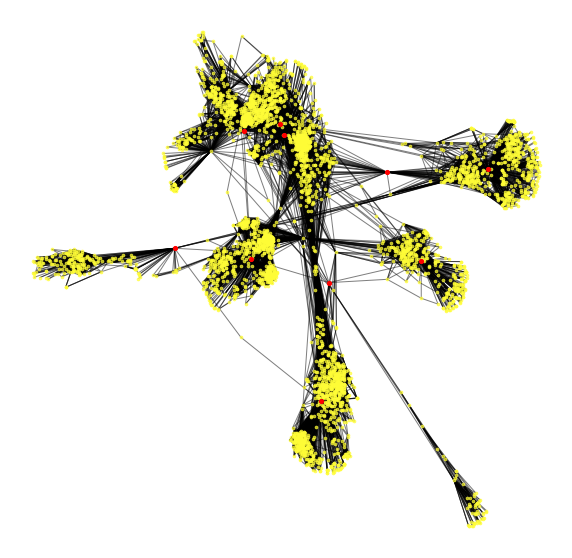

In [113]:
# PRINT

print("Highlight nodes with the highest betweenness centrality")
plot_network(G, position, nodes, np.array(high_btw)[:,0] , 'r', True, True)

From the previous plot, it is evident that nodes (red ones) which links different clusters play a fundamental role. They have an high betw_cent because they are linked to a lot of people of diffrent clusters.Then, everytime that a path has to move from one cluster to another, it has to pass through them.

**Eigenvector Centrality**: is a measure of the influence of a node in a network. It quantifies how well connected a vertex is, especially to vertices that are themselves well connected.

Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors.

Relative scores are assigned to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. A high eigenvector score means that a node is connected to many nodes who themselves have high scores. 

Eigenvector centrality is a more sophisticated view of centrality: a person with few connections could have a very high eigenvector centrality if those few connections were to very well-connected others. Eigenvector centrality allows for connections to have a variable value, so that connecting to some vertices has more benefit than connecting to others.

In [64]:
# warning!! the next command is realy slow

eigenv_centrality = nx.eigenvector_centrality(G) 

In [67]:
high_eig_cen = sorted(eigenv_centrality.items(), key=itemgetter(1), reverse=True)[:10]

print("Nodes with highest EIGENVECTOR CENTRALITY:")
for i in range(10):
    print(f"Position #{i+1}: node {high_eig_cen[i][0]} with eig_cent {high_btw[i][1]}")

Nodes with highest EIGENVECTOR CENTRALITY:
Position #1: node 1912 with eig_cent 0.4805180785560152
Position #2: node 2266 with eig_cent 0.3377974497301992
Position #3: node 2206 with eig_cent 0.23611535735892905
Position #4: node 2233 with eig_cent 0.2292953395868782
Position #5: node 2464 with eig_cent 0.14901509211665306
Position #6: node 2142 with eig_cent 0.14630592147442917
Position #7: node 2218 with eig_cent 0.11533045020560802
Position #8: node 2078 with eig_cent 0.09631033121856215
Position #9: node 2123 with eig_cent 0.08436020590796486
Position #10: node 1993 with eig_cent 0.06430906239323866


Highlight nodes with the highest eigenvector centrality


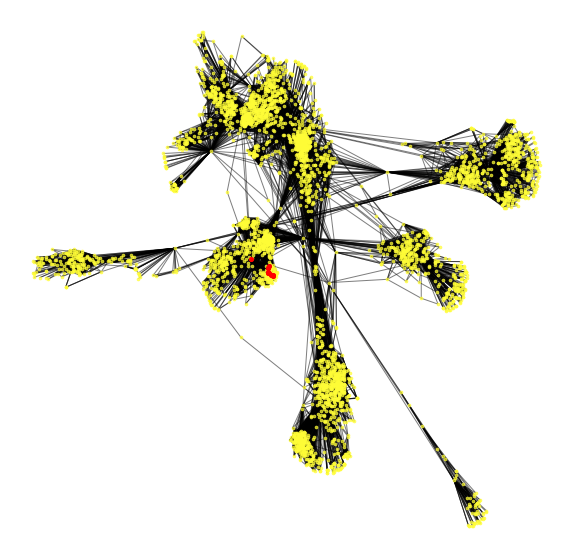

In [114]:
# PRINT

print("Highlight nodes with the highest eigenvector centrality")
plot_network(G, position, nodes, np.array(high_eig_cen)[:,0] , 'r', True, True)


**Common Plot**
Now, we plot all these different types of significant nodes

- Node degree : red
- Betweenness : light blue
- Eigenvector centrality : pink

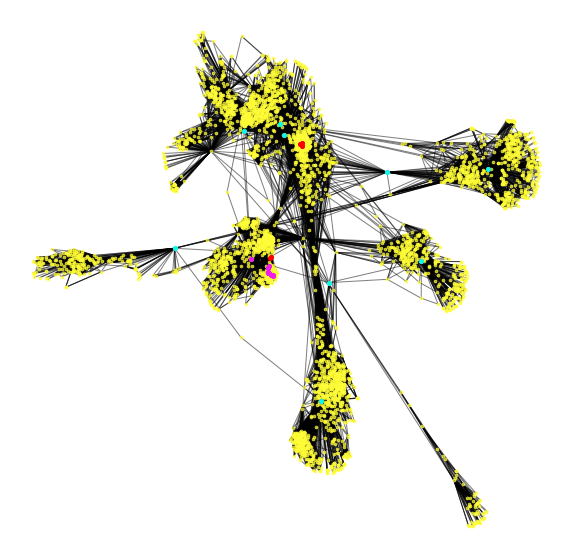

In [119]:
plot_network(G, position, nodes, centrality , 'r', True, False)
plot_network(G, position, nodes, np.array(high_btw)[:,0] , '#0bf9ea', False, False)
plot_network(G, position, nodes, np.array(high_eig_cen)[:,0]  , '#ef1de7' , False, True)